## Introduction
In our exploratory analysis, we tried to understand the bike trips that are taken in different time scale. Accompanied by the information of membership, we can figure out the bike rental patterns of Austin B-Cycle.

## Data pre-processing

In [1]:
from datetime import *
from gmplot import gmplot
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
stations = pd.read_csv("austin-bike-data/austin_bikeshare_stations.csv")
trips = pd.read_csv("austin-bike-data/austin_bikeshare_trips.csv")
trips[:5]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [3]:
#transfer time into datetime
trips["start_time"] = trips["start_time"].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
trips["hours"] = trips["start_time"].map(lambda x : x.hour)
trips["weekday"] = trips["start_time"].map(lambda x : x.isoweekday())

## What are the top 5 popular memberships?

In [4]:
freq_m_year = trips.groupby(["year", "subscriber_type"])["subscriber_type"].count()

s_2014 = pd.Series(freq_m_year.loc[2014.0].sort_values(ascending = False)[:5])
s_2015  = pd.Series(freq_m_year.loc[2015.0].sort_values(ascending = False)[:5])
s_2016  = pd.Series(freq_m_year.loc[2016.0].sort_values(ascending = False)[:5])
s_sum = [sum(freq_m_year.loc[2014.0]), sum(freq_m_year.loc[2015.0]), sum(freq_m_year.loc[2016.0])]


In [5]:
s_2014.index = ["24-Hour Kiosk", "Annual_M", "Walk Up", "7-Day_M", "Founding_M"]
s_2016.index = ["Walk Up", "Local365", "Local30", "Weekender", "Local365_$80"]

In [6]:
def autolabel(ax, rects, year_sum):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        percentage = str(int(round(height/float(year_sum),2) *100)) + "%"
        ax.text(rect.get_x() + rect.get_width()/2., 1.015*height,
                 percentage,
                ha='center', va='bottom')




In [7]:
cc_2014 = ["c", "navy", "seagreen", "grey", "red"]
cc_2015 = ["seagreen","steelblue" ,"orange" , "yellowgreen", "grey"]
cc_2016 = ["seagreen", "steelblue","orange" , "yellowgreen", "purple"]

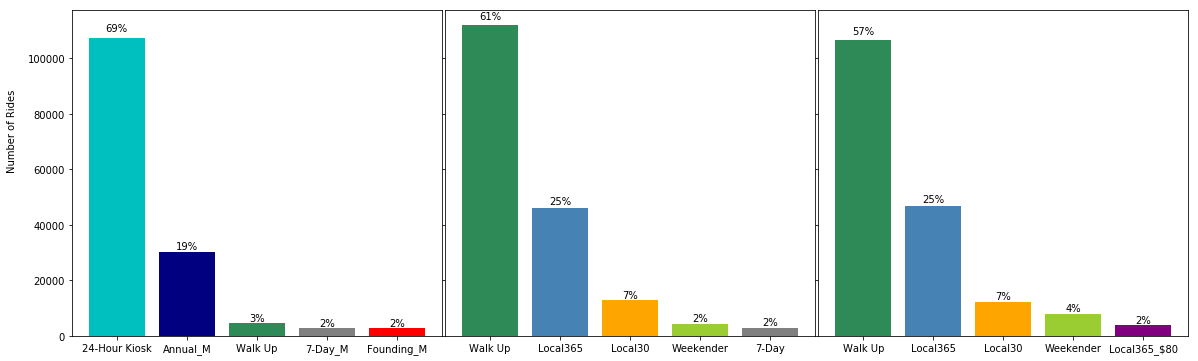

In [8]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,
                                ncols=3,
                                sharey=True,
                                figsize=(20, 6))
fig.text(0.08, 0.6,"Number of Rides", va='center', rotation='vertical')
p1 = ax1.bar(s_2014.index.values, s_2014, color = cc_2014)
p2 = ax2.bar(s_2015.index.values, s_2015, color = cc_2015)
p3 = ax3.bar(s_2016.index.values, s_2016, color = cc_2016)
plt.subplots_adjust(wspace =0.01, hspace =0)
autolabel(ax1, p1, s_sum[0])
autolabel(ax2, p2, s_sum[1])
autolabel(ax3, p3, s_sum[2])

#savefig("membersplot.png")

The top 5 popular types of membership accounts for more than 95% of the Austin B-Cycle bike trips

From the bar plot, we know that around 60% of bike trips are contributed by ad-hoc useres. Moreover, trips taken by loclas, who owns a longer membership, shows a growing trend to more than 30%. Expecting the need of bike may be different between these two groups of members, this barplot helps us understand the composition of different type of needs.

## What is the distribution of bike trips taken in each month of a year

In [9]:
active_groups_s = [ "Walk Up","Local365", "Local30", "Weekender",  "Explorer"]
end = datetime.datetime.strptime("2017", "%Y")
start = datetime.datetime.strptime("2014", "%Y")
trips_t_control = trips[(trips["start_time"] > start) & (trips["start_time"] < end)]
active_groups_mask = trips_t_control["subscriber_type"].map(lambda x : x in active_groups_s)

frequent_m_month = trips_t_control[active_groups_mask].groupby(["subscriber_type", "month"])["subscriber_type"].count()

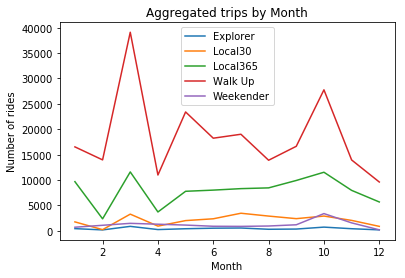

In [10]:
plot (frequent_m_month.loc["Explorer"], marker='None', linestyle='-', label='Explorer')
plot (frequent_m_month.loc["Local30"], marker='None', linestyle='-', label='Local30')
plot (frequent_m_month.loc["Local365"], marker='None', linestyle='-', label='Local365')
plot (frequent_m_month.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up')
plot (frequent_m_month.loc["Weekender"], marker='None', linestyle='-', label='Weekender')
xlabel('Month')
ylabel('Number of rides')
title("Aggregated trips by Month")
legend(loc='best')
show()

We can see that summer is the season having more bike rides. It is noteworthy that there is two spikes of bike rentals in March and October, which are months that South by South West (SXSW) and Austin City Limit (ACL) are held in Austin, Texas.

## What if we plot the trips by week? What happens in weeks SXSW and ACL are held?


In [11]:
def plot_lines(df, subplots, title, xlabel, ylabel):
   '''Generates one or more line plots from pandas dataframe'''

   fig, ax = subplots
   ax = df.plot.line(ax=ax)
   ax.set_xlabel(xlabel, fontdict={'size' : 14})
   ax.set_ylabel(ylabel, fontdict={'size' : 14})
   ax.set_title(title, fontdict={'size' : 18})
   ttl = ax.title
   ttl.set_position([.5, 1.02])
   ax.tick_params(axis='x', labelsize=14)
   ax.tick_params(axis='y', labelsize=14)


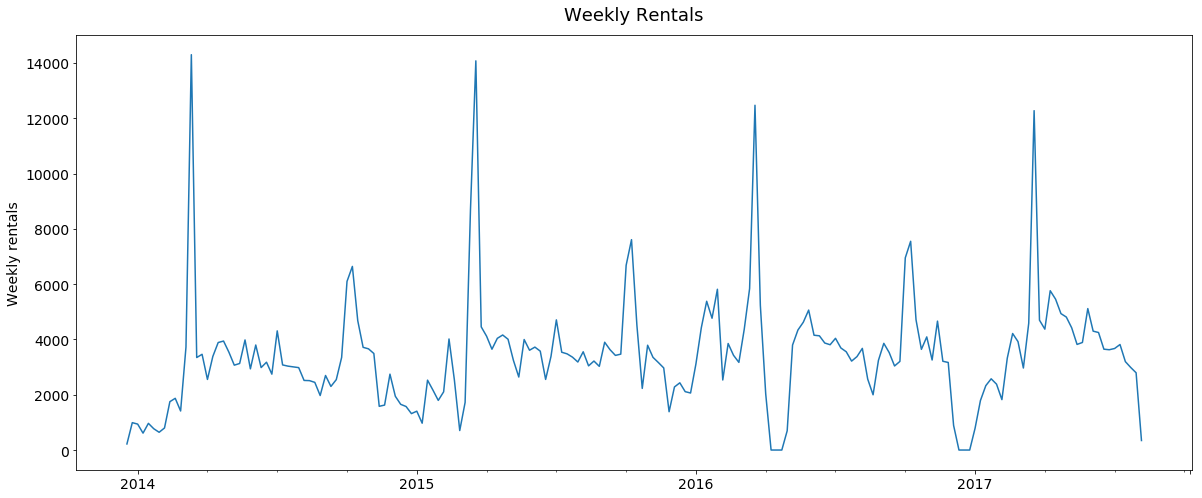

In [12]:
plot_week_df = trips.set_index("start_time")
plot_week_df.resample('W').size().head()
plot_lines(plot_week_df.resample('W').size(), plt.subplots(1,1, figsize=(20,8)),
              title='Weekly Rentals', xlabel='', ylabel='Weekly rentals')
#savefig("WeeklyRentalplot.png")

The weekly plot trend confirms that the spike in March and October are caused by SXSW and ACL.

## Does each day of a week has the same number of bike rides?


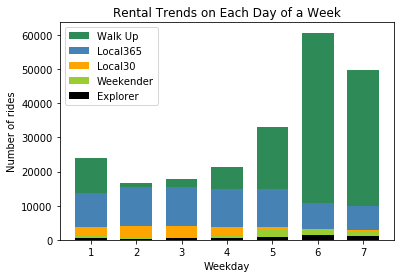

In [13]:
fig, ax = plt.subplots()
active_groups_s
frequent_m_weekday = trips_t_control[active_groups_mask].groupby(["subscriber_type", "weekday"])["subscriber_type"].count()
cc= ["seagreen", "steelblue" , "orange","yellowgreen", "black",]
for i in range(len(active_groups_s)):
    ax.bar( frequent_m_weekday.loc[active_groups_s[i]].index.values, 
            frequent_m_weekday.loc[active_groups_s[i]] , 
                                0.7, color = cc[i] , label = active_groups_s[i])

title("Rental Trends on Each Day of a Week")
ylabel('Number of rides')
xlabel("Weekday")
legend()
#savefig("BarplotByWeek.png")

From the plot below we can see that "Local 365" and "Loacal 30" have higher bike usage rate in the weekdays, while walk up members have more bike rentals on weekends.

## Plots on bike rental trends in a day

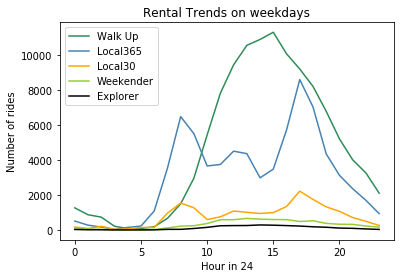

In [14]:
frequent_m_hour = trips_t_control[active_groups_mask & (trips_t_control["weekday"] <6)].groupby(["subscriber_type", "hours"])["subscriber_type"].count()
plot (frequent_m_hour.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up', color = "seagreen")
plot (frequent_m_hour.loc["Local365"], marker='None', linestyle='-', label='Local365', color = "steelblue")
plot (frequent_m_hour.loc["Local30"], marker='None', linestyle='-', label='Local30', color = "orange")
plot (frequent_m_hour.loc["Weekender"], marker='None', linestyle='-', label='Weekender', color = "yellowgreen")
plot (frequent_m_hour.loc["Explorer"], marker='None', linestyle='-', label='Explorer', color = "black")

xlabel('Hour in 24')
ylabel('Number of rides')
title("Rental Trends on weekdays")
legend(loc='best')
#savefig("Daily_Rental_Trend(Weekdays).png")
show()

In weekdays, local members tend to have higher bike usage during rush hours. In contrast, explorer's bike rental are more spreadout through the whole day.

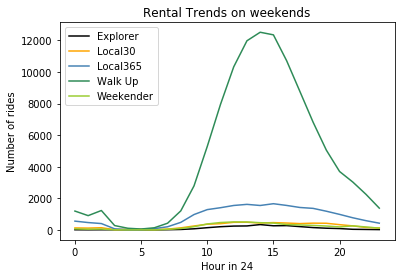

In [15]:
frequent_m_hour = trips_t_control[active_groups_mask & (trips_t_control["weekday"] >= 6)].groupby(["subscriber_type", "hours"])["subscriber_type"].count()
plot (frequent_m_hour.loc["Explorer"], marker='None', linestyle='-', label='Explorer', color = "black")
plot (frequent_m_hour.loc["Local30"], marker='None', linestyle='-', label='Local30', color = "orange")
plot (frequent_m_hour.loc["Local365"], marker='None', linestyle='-', label='Local365', color = "steelblue")
plot (frequent_m_hour.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up', color = "seagreen")
plot (frequent_m_hour.loc["Weekender"], marker='None', linestyle='-', label='Weekender', color = "yellowgreen")
xlabel('Hour in 24')
ylabel('Number of rides')
title("Rental Trends on weekends")
legend(loc='best')
#savefig("Daily_Rental_Trend(Weekends).png")
show()

On weekends, most bikes are rented in daytime and have no peak in rush hours.

## Bike rents on the big events
Since SXSW and ACL has generated an high demand in bike trips, we worked futher on ploting the trips in these festival to understand the demand pattern and whether such demand had skewed plots we drew to see daily patterns.


## South by South West

In [16]:
SXSW_start_2014 = datetime.datetime(2014, 3, 7, 0, 0, 0)
SXSW_end_2014 = datetime.datetime(2014, 3, 14, 23, 59, 59)
SXSW_start_2015 = datetime.datetime(2015, 3, 13, 0, 0, 0)
SXSW_end_2015 = datetime.datetime(2015, 3, 23, 23, 59, 59)
SXSW_start_2016 = datetime.datetime(2016, 3, 11, 0, 0, 0)
SXSW_end_2016 = datetime.datetime(2016, 3, 20, 23, 59, 59)

In [17]:
SXSW_mask = ((trips_t_control["start_time"] > SXSW_start_2014) & (trips_t_control["start_time"] < SXSW_end_2014)) | \
                   ((trips_t_control["start_time"] > SXSW_start_2015) & (trips_t_control["start_time"] < SXSW_end_2015)) | \
                  ((trips_t_control["start_time"] > SXSW_start_2016) & (trips_t_control["start_time"] < SXSW_end_2016))

In [18]:
trips_SXSW = trips_t_control[SXSW_mask]
SXSW_weekend_hour = trips_SXSW[(trips_SXSW["weekday"] >= 6)].groupby(["year"])["year"].count()
SXSW_weekday_hour = trips_SXSW[ (trips_SXSW["weekday"] < 6)].groupby(["year"])["year"].count()

In [19]:
SXSW_weekend_hour.values

array([1878, 7780, 6556])

In [20]:
SXSW_weekend_hour.index = [str(int(i)) for i in SXSW_weekend_hour.index.values]
SXSW_weekday_hour.index = [str(int(i)) for i in SXSW_weekday_hour.index.values]

In [21]:
SXSW_plot_df = pd.DataFrame({"Weekends": SXSW_weekend_hour.values, "Weekdays" : SXSW_weekday_hour.values}, 
                            index = [2014, 2015, 2016] )

SXSW_plot_df["Weekdays"] = SXSW_plot_df["Weekdays"]/5
SXSW_plot_df["Weekends"] = SXSW_plot_df["Weekends"]/2

From the plot bellow, I plotted the comparision of daily bike rent between weekdays and weekends. Generally, SXSW has a balanced bike rental demand between weekdays and weekdens.

Text(0.5,1,'SXSW weekdays V.S. weekend plot')

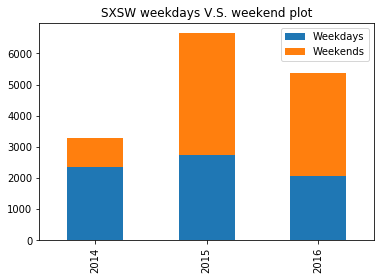

In [22]:
SXSW_plot_df.plot.bar(stacked=True)
title("SXSW weekdays V.S. weekend plot")
#savefig("plots_local/SXSW_weekday2weekend_regularized_by_day.png")

Most trips in SXSW are taken in the morning.

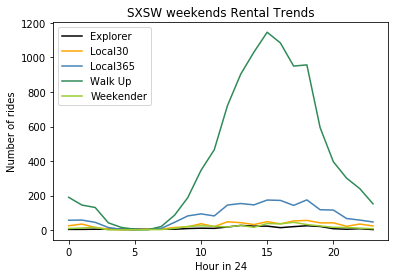

In [23]:
SXSW_hour = trips_SXSW[(trips_SXSW["weekday"] >= 6)].groupby([ "subscriber_type", "hours"])[["hours"]].count()

plot (SXSW_hour.loc["Explorer"], marker='None', linestyle='-', label='Explorer', color = "black")
plot (SXSW_hour.loc["Local30"], marker='None', linestyle='-', label='Local30', color = "orange")
plot (SXSW_hour.loc["Local365"], marker='None', linestyle='-', label='Local365', color = "steelblue")
plot (SXSW_hour.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up', color = "seagreen")
plot (SXSW_hour.loc["Weekender"], marker='None', linestyle='-', label='Weekender', color = "yellowgreen")
xlabel('Hour in 24')
ylabel('Number of rides')
title("SXSW weekends Rental Trends")
legend(loc='best')
#savefig("SXSW weekends Rental Trends.png")
show()

## Austin City Limit

In [24]:
ACL_start_2014_W1 = datetime.datetime(2014, 10, 3, 0, 0, 0)
ACL_end_2014_W1 = datetime.datetime(2014, 10, 5, 23, 59, 59)
ACL_start_2014_W2 = datetime.datetime(2014, 10, 10, 0, 0, 0)
ACL_end_2014_W2 = datetime.datetime(2014, 10, 12, 23, 59, 59)
ACL_start_2015_W1 = datetime.datetime(2015, 10, 2, 0, 0, 0)
ACL_end_2015_W1 = datetime.datetime(2015, 10, 4, 23, 59, 59)
ACL_start_2015_W2 = datetime.datetime(2015, 10, 9, 0, 0, 0)
ACL_end_2015_W2 = datetime.datetime(2015, 10, 11, 23, 59, 59)
ACL_start_2016_W1 = datetime.datetime(2016, 9, 30, 0, 0, 0)
ACL_end_2016_W1 = datetime.datetime(2016, 10, 2, 23, 59, 59)
ACL_start_2016_W2 = datetime.datetime(2016, 10, 7, 0, 0, 0)
ACL_end_2016_W2 = datetime.datetime(2016, 10, 9, 23, 59, 59)

In [25]:
ACL_mask = ((trips_t_control["start_time"] > ACL_start_2014_W1) & (trips_t_control["start_time"] < ACL_end_2014_W1)) | \
                  ((trips_t_control["start_time"] > ACL_start_2014_W2) & (trips_t_control["start_time"] < ACL_end_2014_W2)) | \
                   ((trips_t_control["start_time"] > ACL_start_2015_W1) & (trips["start_time"] < ACL_end_2015_W1)) | \
                  (trips_t_control["start_time"] > ACL_start_2015_W2) & (trips_t_control["start_time"] < ACL_end_2015_W2) | \
                 ((trips_t_control["start_time"] > ACL_start_2016_W1) & (trips_t_control["start_time"] < ACL_end_2016_W1)) | \
                ((trips_t_control["start_time"] > ACL_start_2016_W2) & (trips_t_control["start_time"] < ACL_end_2016_W2))

In [26]:
trips_ACL = trips_t_control[ACL_mask]
ACL_hour = trips_ACL[trips_ACL["weekday"] >= 6].groupby(["subscriber_type", "hours"])["subscriber_type"].count()
ACL_weekend_hour = trips_ACL[(trips_ACL["weekday"] >= 6)].groupby(["year"])["year"].count()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


While ACL is a weekend event, we can only compare the difference of rental across three years. We can see a growing trend of bike demand.

Text(0.5,1,'ACL weekend')

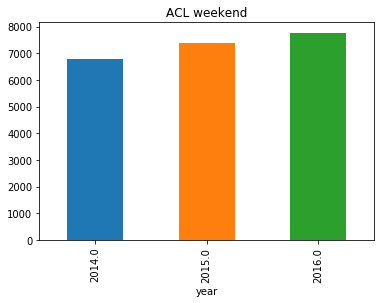

In [27]:
ACL_weekend_hour.plot(kind = "bar")
title("ACL weekend")
#savefig("plots_local/ACLweekend.png")

Compared to SXSW, ACL ends later at night, so there is a spike around 10 pm for people leaving from ACL.

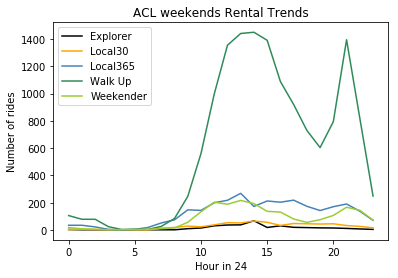

In [28]:
ACL_hour = trips_ACL.groupby([ "subscriber_type", "hours"])[["hours"]].count()

plot (ACL_hour.loc["Explorer"], marker='None', linestyle='-', label='Explorer', color = "black")
plot (ACL_hour.loc["Local30"], marker='None', linestyle='-', label='Local30', color = "orange")
plot (ACL_hour.loc["Local365"], marker='None', linestyle='-', label='Local365', color = "steelblue")
plot (ACL_hour.loc["Walk Up"], marker='None', linestyle='-', label='Walk Up', color = "seagreen")
plot (ACL_hour.loc["Weekender"], marker='None', linestyle='-', label='Weekender', color = "yellowgreen")
xlabel('Hour in 24')
ylabel('Number of rides')
title("ACL weekends Rental Trends")
legend(loc='best')
#savefig("ACL weekends Rental Trends.png")
show()

## Barchart by day of a week taking out SXSW and ACL trips
After taking out SXSW and ACL bike rental, we observed no difference in numbers of bike rental in a week.

In [29]:
trips_exclude_events = trips_t_control[ (~ACL_mask) & (~SXSW_mask)]
trips_excluded_weekdays = trips_exclude_events[active_groups_mask].groupby(["subscriber_type", "weekday"])["subscriber_type"].count()
trips_excluded_weekdays[:10]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


subscriber_type  weekday
Explorer         1           573
                 2           287
                 3           362
                 4           415
                 5           698
                 6          1186
                 7           768
Local30          1          3361
                 2          3733
                 3          3711
Name: subscriber_type, dtype: int64

Text(0.5,1,'Rental Trends on Each Day Excluding ACL and SXSW')

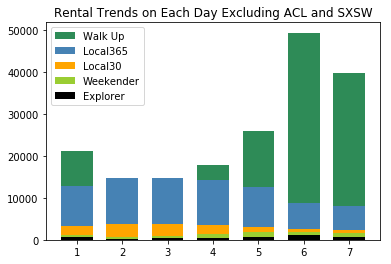

In [30]:
fig, ax = plt.subplots()

cc= ["seagreen", "steelblue" , "orange","yellowgreen", "black",]
for i in range(len(active_groups_s)):
    ax.bar( trips_excluded_weekdays.loc[active_groups_s[i]].index.values, 
            trips_excluded_weekdays.loc[active_groups_s[i]] , 
                                0.7, color = cc[i] , label = active_groups_s[i])

legend()
title("Rental Trends on Each Day Excluding ACL and SXSW")
#savefig("plots_local/Rental Trends on Each Day Excluding ACL and SXSW")


## We can conclude that:

### The Walk up membership accounts over 60% of the rides. Most of the rides taken are on weekends and are more on a ad-hoc base.
### The locals are renting more bikes on weekdays, which causes the bike rebalancing problem during rush hours.
### The above results has taken the spike of trips during SXSW and ACL into consideration.